In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr2911.xlsx', index_col=0)

Now that the dataset is mostly clean, I am going to examine how being an immigrant affects test scores, positive feelings in school and negative experiences in school across different countries. In this notebook I will be focusing on test scores. 

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

# Literacy Test Scores

## Literacy Bar chart

Firstly, I want to have a less granular indicator of test scores. 

In [4]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [5]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

In [6]:
# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [7]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [8]:
pivot_df_avgliteracy = df.pivot_table(values=averages, index=['Country','ASBH02A'], aggfunc='mean').reset_index()

In [9]:
df_foreign_born = pivot_df_avgliteracy[pivot_df_avgliteracy['ASBH02A']=='No'].drop('ASBH02A', axis=1).melt(id_vars='Country', var_name='Metric', value_name='Value')

In [16]:
df_foreign_born = pivot_df_avgliteracy[pivot_df_avgliteracy['ASBH02A']=='No']
df_foreign_born= df_foreign_born.drop('ASBH02A', axis=1)
df_foreign_born = df_foreign_born.melt(id_vars='Country', var_name='Metric', value_name='Value')

### The problem is below I believe - it's not melted

In [17]:
df_foreign_born

,Country,Metric,Value
0,Austria,informational_purpose_avg,498.657408
1,Egypt,informational_purpose_avg,370.511240
2,France,informational_purpose_avg,491.164422
3,Germany,informational_purpose_avg,493.821976
4,Iran,informational_purpose_avg,415.629239
5,Jordan,informational_purpose_avg,385.640608
6,Netherlands,informational_purpose_avg,534.779113
7,Sweden,informational_purpose_avg,513.800935
8,Turkey,informational_purpose_avg,459.545292
9,Austria,interpreting_process_avg,497.365857


In [9]:
df_native_born = pivot_df_avgliteracy[pivot_df_avgliteracy['ASBH02A']=='Yes']
df_native_born= df_native_born.drop('ASBH02A', axis=1)
df_native_born_melted = df_native_born.melt(id_vars='Country', var_name='Metric', value_name='Value')

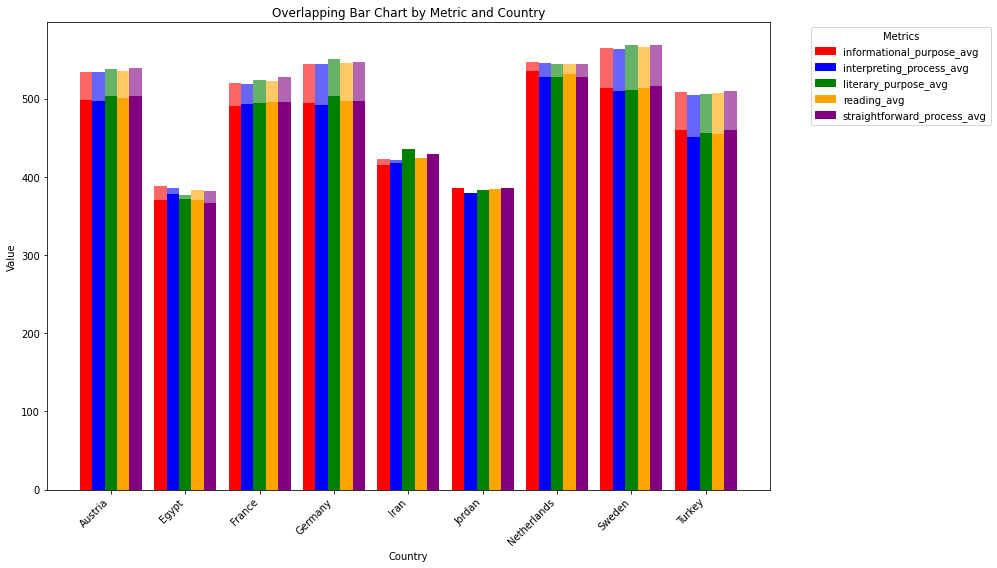

In [10]:
# Define bar width
bar_width = 1
n_metrics = df_foreign_born_melted['Metric'].nunique()

# Colors for each metric
colors = {
    'informational_purpose_avg': 'red',
    'interpreting_process_avg': 'blue',
    'literary_purpose_avg': 'green',
    'reading_avg': 'orange',
    'straightforward_process_avg': 'purple'
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Get unique countries and metrics
countries = df_foreign_born_melted['Country'].unique()
metrics = df_foreign_born_melted['Metric'].unique()

# Create x indices for each group of bars
indices = np.arange(len(countries)) * (n_metrics + 1)

# Plot each group of bars for 'yes' and 'no'
for i, metric in enumerate(metrics):
    yes_values = df_native_born_melted[df_native_born_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    no_values = df_foreign_born_melted[df_foreign_born_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    
    color = colors[metric]
    ax.bar(indices + i * bar_width, yes_values, bar_width, color=color, alpha=0.6)
    ax.bar(indices + i * bar_width, no_values, bar_width, color=color, alpha=1.0)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Overlapping Bar Chart by Metric and Country')

# Set x-ticks and x-tick labels
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=metric) for metric, color in colors.items()]
ax.legend(handles=legend_handles, title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show plot
plt.tight_layout()
plt.show()

## Literacy Heat Map

In [11]:
# Calculate the total average for each row
pivot_df_avgliteracy['MeanTotal'] = pivot_df_avgliteracy[['informational_purpose_avg', 'interpreting_process_avg', 'literary_purpose_avg', 'reading_avg', 'straightforward_process_avg']].mean(axis=1)

# Sort countries by the total average
country_averages = pivot_df_avgliteracy.groupby('Country')['MeanTotal'].mean().sort_values(ascending=False).index.tolist()

# Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

# Sort the DataFrame
pivot_df_avgliteracy['Country'] = pd.Categorical(pivot_df_avgliteracy['Country'], categories=country_averages, ordered=True)
pivot_df_avgliteracy['ASBH02A'] = pd.Categorical(pivot_df_avgliteracy['ASBH02A'], categories=asbh02a_sorter, ordered=True)

pivot_df_avgliteracy = pivot_df_avgliteracy.sort_values(['Country', 'ASBH02A'])

# Drop the 'MeanTotal' column for the heatmap
df_heatmap = pivot_df_avgliteracy.drop(columns=['MeanTotal'])

# Set the index to ['Country', 'ASBH02A'] for the heatmap
df_heatmap.set_index(['Country', 'ASBH02A'], inplace=True)

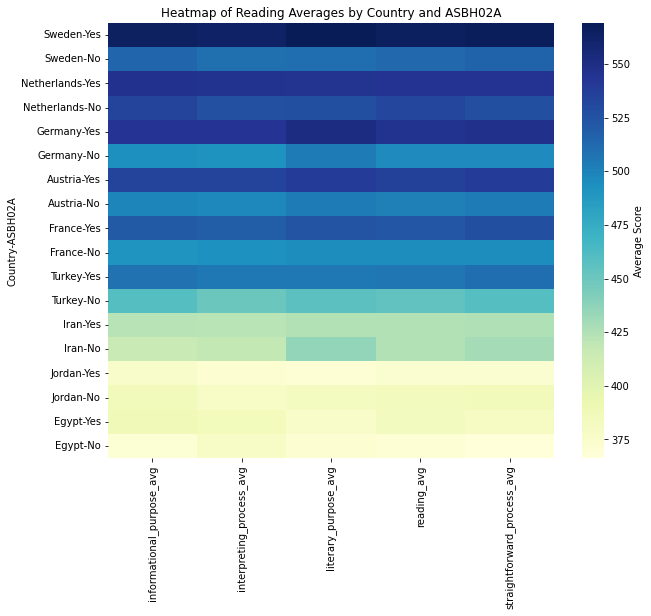

In [11]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Average Score'})
plt.title('Heatmap of Reading Averages by Country and ASBH02A')
plt.show()

Literary purpose is a bit darker so perhaps those questions are a bit easier? Immigrants in Iran seem to do better than natives but this is perhaps not so surprising as the majority of immigrants in Iran are from Afghanistan? and have same language?

## Literacy Average Distribution

In [20]:
df["literacyavg"] = df[averages].mean(axis=1)

In [21]:
df['literacyavg_binned'] = pd.cut(df['literacyavg'], bins=10)

In [22]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['literacyavg_binned'])

# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()

contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='literacyavg_binned', value_name='count')

In [23]:
contingency_table_melted

,ASBH02A,literacyavg_binned,count
0,No,"(159.978, 220.218]",55
1,Yes,"(159.978, 220.218]",821
2,No,"(220.218, 279.862]",153
3,Yes,"(220.218, 279.862]",1886
4,No,"(279.862, 339.506]",297
5,Yes,"(279.862, 339.506]",2794
6,No,"(339.506, 399.149]",415
7,Yes,"(339.506, 399.149]",4167
8,No,"(399.149, 458.793]",614
9,Yes,"(399.149, 458.793]",6105


### Separated functions

In [16]:
# Calculate total counts for 'No' and 'Yes'
total_no = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'No']['count'].sum()
total_yes = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'Yes']['count'].sum()

# Calculate the percentage
contingency_table_melted['percentage'] = contingency_table_melted.apply(lambda row: (row['count'] / total_no * 100) if row['ASBH02A'] == 'No' else (row['count'] / total_yes * 100), axis=1)

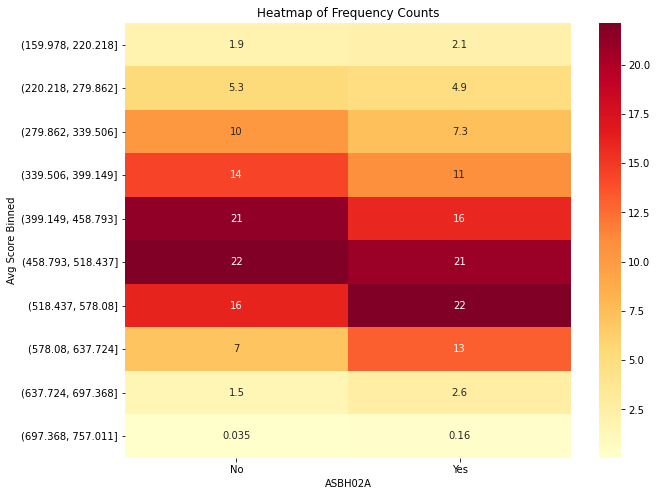

In [17]:
# Assuming contingency_table_melted is your DataFrame
# You might need to pivot the DataFrame to create a matrix for the heatmap
## index, column, values
heatmap_data = contingency_table_melted.pivot(index = "literacyavg_binned", columns = "ASBH02A", values = "percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

In [18]:
# Create a contingency table
contingency_table2 = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['literacyavg_binned'])

In [19]:
# Convert the contingency table to a format suitable for Plotly
contingency_table2_reset = contingency_table2.reset_index()
contingency_table2_melted = contingency_table2_reset.melt(id_vars=['ASBH02A','Country'], var_name='literacyavg_binned', value_name='count')
# Convert Interval objects to strings
contingency_table2_melted['literacyavg_binned'] = contingency_table2_melted['literacyavg_binned'].astype(str)

In [20]:
df_native_born = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'Yes']

In [21]:
heatmap_yes = df_native_born.pivot(index='Country',columns="literacyavg_binned",values = "count")

In [22]:
heatmap_yes["total"]= heatmap_yes.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_yes = heatmap_yes['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_yes = heatmap_yes.div(total_column_yes, axis=0) * 100
df_percentage_yes = df_percentage_yes.drop("total", axis = 1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_yes_reset = df_percentage_yes.reset_index()
df_percentage__yes_melted = df_percentage_yes_reset.melt(id_vars='Country', var_name='literacyavg_binned', value_name='percentage')

In [23]:
heatmap_percent_yes = df_percentage__yes_melted.pivot(index = "literacyavg_binned", columns = "Country", values = "percentage")

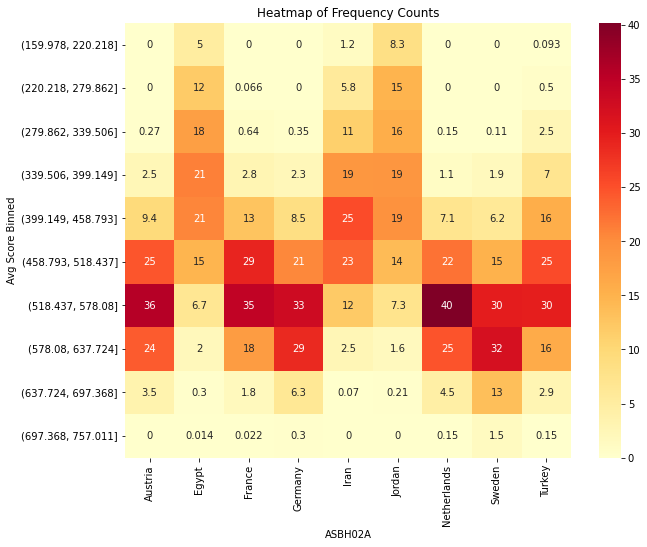

In [24]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_yes, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

In [25]:
df_foreign_born = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'No']
df_foreign_born= df_foreign_born.drop('ASBH02A', axis=1)
heatmap_no = df_foreign_born.pivot(index='Country',columns="literacyavg_binned",values = "count")

In [26]:
heatmap_no["total"] = heatmap_no.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_no = heatmap_no['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_no = heatmap_no.div(total_column_no, axis=0) * 100
df_percentage_no = df_percentage_no.drop("total", axis=1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_no_reset = df_percentage_no.reset_index()
df_percentage_no_melted = df_percentage_no_reset.melt(id_vars='Country', var_name='literacyavg_binned', value_name='percentage')


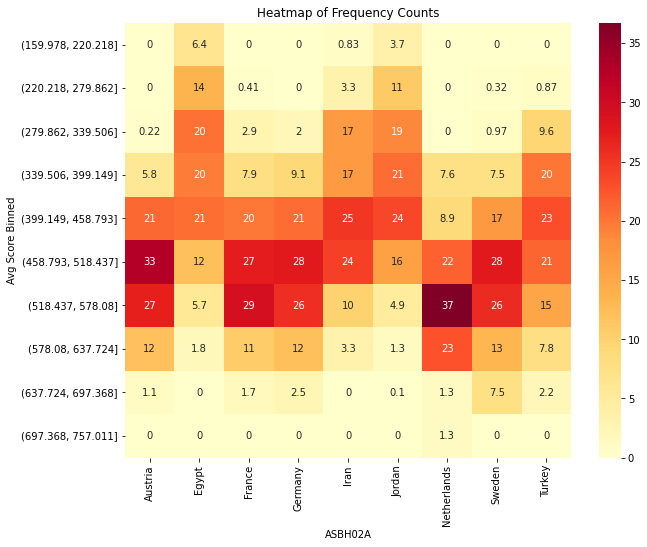

In [27]:
heatmap_percent_no = df_percentage_no_melted.pivot(index="literacyavg_binned", columns="Country", values="percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_no, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()


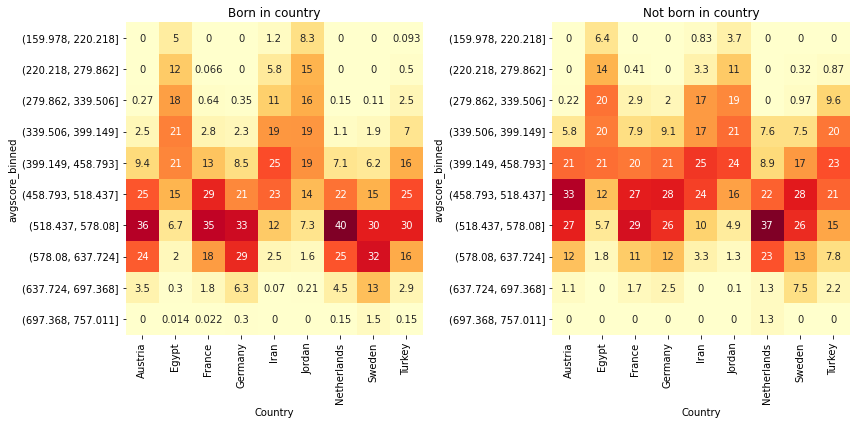

In [28]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_percent_yes, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_percent_no, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='avgscore_binned'>

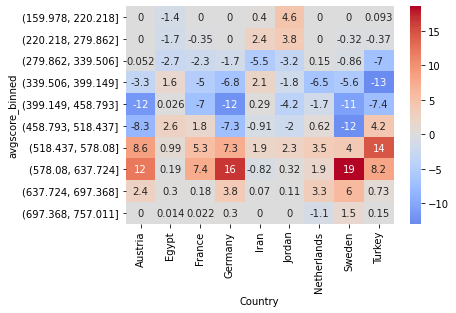

In [29]:
diff_data = heatmap_percent_yes - heatmap_percent_no

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

Can also now split the dataframes into countries and plot the countries side by side.

## Literacy Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [30]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38469
0.0     1108
3.0      852
6.0      480
8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [31]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna(-1.0)

In [32]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38469
 0.0     1108
 3.0      852
 6.0      480
 8.0      249
Name: MINAGEARRIVAL, dtype: int64

In [33]:
pivot_minage = df.pivot_table(values='literacyavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

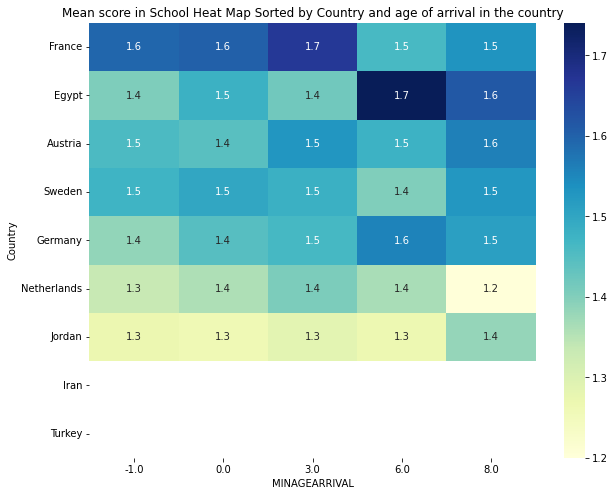

In [119]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

In [34]:
pivot_minage

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Austria,535.931404,524.691549,503.023525,482.467533,472.698753
Egypt,382.924265,382.087467,360.526565,358.256269,359.496124
France,522.219901,514.789067,500.251059,487.735549,449.952812
Germany,546.167948,513.748950,489.432386,491.374898,495.923077
Iran,423.849517,413.120203,437.669405,450.368901,429.309478
Jordan,373.134379,381.524723,385.670465,385.830969,372.786823
Netherlands,544.917812,546.704431,510.434272,532.347393,529.268667
Sweden,565.960709,547.588860,506.832225,496.426190,486.933911
Turkey,507.204903,461.440636,438.160717,469.426985,446.103548


In [35]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_minage.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

### Create a custom sorter for ASBH02A
## asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_minage.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries_means, ordered=True)
##index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_minage.loc[index_df.index]

In [36]:
sorted_pivot_rounded = sorted_pivot_df.round(2)

In [37]:
sorted_pivot_rounded

MINAGEARRIVAL,-1.0,0.0,3.0,6.0,8.0
Country,,,,,
Netherlands,544.92,546.70,510.43,532.35,529.27
Sweden,565.96,547.59,506.83,496.43,486.93
Germany,546.17,513.75,489.43,491.37,495.92
Austria,535.93,524.69,503.02,482.47,472.70
France,522.22,514.79,500.25,487.74,449.95
Turkey,507.20,461.44,438.16,469.43,446.10
Iran,423.85,413.12,437.67,450.37,429.31
Jordan,373.13,381.52,385.67,385.83,372.79
Egypt,382.92,382.09,360.53,358.26,359.50


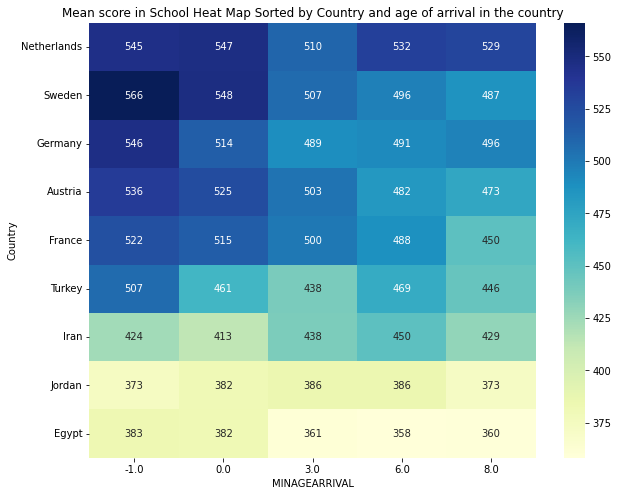

In [38]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_rounded, annot=True,fmt=".0f", cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

Next steps - comparisons with bench marks - through line? 
Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

Also practice making same graphics with otherprograms